In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pathlib
import glob
import os

import keras
from keras import models
from keras import layers
from keras.preprocessing import image_dataset_from_directory

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
sess = InteractiveSession(config=config)
tf.config.list_logical_devices('GPU')

import mlflow.keras

mlflow.autolog()

2021/04/28 11:30:59 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2021/04/28 11:30:59 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2021/04/28 11:31:00 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


In [2]:
# import splitfolders

# splitfolders.ratio("../csDeepLearning/final_project/data/gc_datasets/traffic_level/", output="traffic_level", seed=9, ratio=(0.8, 0.2))

In [3]:
batch_size = 64
height = 96
width = 128

In [4]:
in_dir = pathlib.Path("./traffic_level/train/")
train_ds = image_dataset_from_directory(
    in_dir,
    validation_split=0.2, 
    subset='training',
    seed=9,
    image_size=(height, width),
    batch_size=batch_size
)

Found 1534 files belonging to 5 classes.
Using 1228 files for training.


In [5]:
val_ds = image_dataset_from_directory(
    in_dir,
    validation_split=0.2, 
    subset='validation',
    seed=9,
    image_size=(height, width),
    batch_size=batch_size
)

Found 1534 files belonging to 5 classes.
Using 306 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '2', '3', '4']


In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

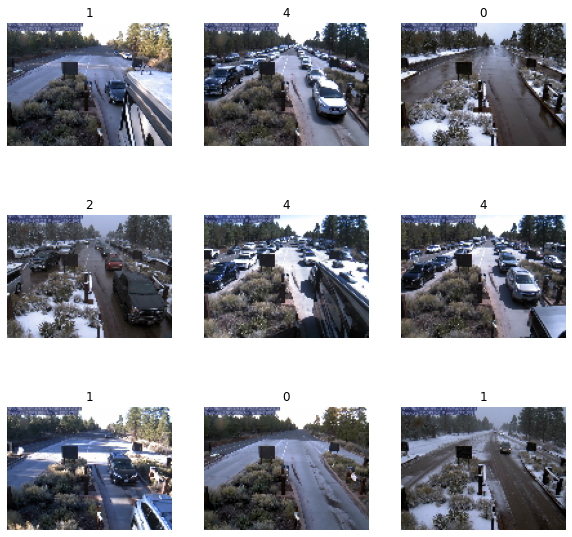

In [8]:
# Quickly display a few of the images to get an idea of what the data looks like after some light processing
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [9]:
# from keras.applications import VGG16

# conv_base = VGG16(weights='imagenet',
#                   include_top=False,
#                   input_shape=(height, width, 3))

In [20]:
# Build the model (functional API style)
inputs = keras.Input(shape=(height, width, 3))
# Data augmentation layers (Data set isn't super big and wanted to take advantage of as much training data as possible and regularize)
# x = keras.layers.experimental.preprocessing.RandomFlip("horizontal")(inputs)
# x = keras.layers.experimental.preprocessing.RandomRotation(0.05)(x)
# x = keras.layers.experimental.preprocessing.RandomZoom(0.05)(x)
x = keras.layers.experimental.preprocessing.RandomContrast(0.3)(inputs)
# x = keras.layers.experimental.preprocessing.RandomTranslation(height_factor=(-0.05, 0.05), width_factor=(-0.05, 0.05), fill_mode='nearest')(x)
# x = keras.layers.Dropout(0.2)(x)
# x = keras.layers.MaxPooling2D(pool_size=(7, ), strides=2)(inputs)

x = keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
# x = keras.layers.BatchNormalization()(x)
# x = keras.layers.Dropout(0.5)(x)
# x = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)(x)
x = keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
# x = keras.layers.BatchNormalization()(x)
# x = keras.layers.Dropout(0.2)(x)
# x = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)(x)
x = keras.layers.Conv2D(64, (3, 3), activation='relu', strides=2)(x)
# x = keras.layers.BatchNormalization()(x)
# x = keras.layers.Dropout(0.5)(x)
# x = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)(x)
x = keras.layers.Conv2D(64, (3, 3), activation='relu', strides=2)(x)
# x = keras.layers.BatchNormalization()(x)
# x = keras.layers.Dropout(0.5)(x)
# x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
# x = keras.layers.BatchNormalization()(x)
# x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
# x = keras.layers.Conv2D(256, (3, 3), activation='relu')(x)
# x = keras.layers.Conv2D(256, (3, 3), activation='relu')(x)
# x = keras.layers.BatchNormalization()(x)
# x = keras.layers.Dropout(0.5)(x)
# x = keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
# # x = keras.layers.BatchNormalization()(x)
# # x = keras.layers.Dropout(0.5)(x)
# # x = keras.layers.Conv2D(256, (1, 1), activation='relu')(x)
# # x = keras.layers.BatchNormalization()(x)
# # x = keras.layers.Dropout(0.5)(x)
# # x = keras.layers.Dropout(0.5)(x)
# x = keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
# # # x = keras.layers.BatchNormalization()(x)
# x = keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
# # # # x = keras.layers.BatchNormalization()(x)
# x = keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
# # x = keras.layers.BatchNormalization()(x)
# x = keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
# x = keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
# x = keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
# x = keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
# x = keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
# x = keras.layers.Conv2D(512, (3, 3), activation='relu')(x)
# # # x = keras.layers.BatchNormalization()(x)
# x = keras.layers.Conv2D(512, (3, 3), activation='relu')(x)
# x = keras.layers.BatchNormalization()(x)
# x = keras.layers.Conv2D(32, (1, 1), activation='relu')(x)
# x = keras.layers.Conv2D(10, (1, 1), activation='relu')(x)
# x = keras.layers.BatchNormalization()(x)

# x = keras.layers.Conv2D(5, (1, 1), activation='relu')(x)
# x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Flatten()(x)
# x = keras.layers.Dense(256, activation='relu')(x)
# x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(128, activation='relu')(x)
# x = keras.layers.Dense(32, activation='relu')(x)
# x = keras.layers.Dropout(0.2)(x)
# x = keras.layers.Dense(128, activation='relu')(x)
# x = keras.layers.Dropout(0.2)(x)


outputs = keras.layers.Dense(5, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs, name='traffic_level_detector')

model.summary()

Model: "traffic_level_detector"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 96, 128, 3)]      0         
_________________________________________________________________
random_contrast_1 (RandomCon (None, 96, 128, 3)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 94, 126, 32)       896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 92, 124, 32)       9248      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 61, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 22, 30, 64)        36928     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 20, 28, 

In [21]:
opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
# opt = keras.optimizers.RMSprop(learning_rate=0.00005)
# opt = keras.optimizers.Adam(learning_rate=0.00001, )
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
callbacks_list = [
    keras.callbacks.EarlyStopping(patience=10, monitor='val_loss', restore_best_weights=True),
    keras.callbacks.ModelCheckpoint(save_best_only=True, monitor='val_accuracy', filepath='checkpoint/best_traffic.h5'),
    keras.callbacks.ReduceLROnPlateau(monitor='loss', patience=3, min_delta=0.0001, factor=0.2)
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    callbacks=callbacks_list,
    batch_size=batch_size,
    epochs=100
)

2021/04/28 11:34:34 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '1e44f566d59744d0abfa7dc0ff0b4306', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
Epoch 1/100
20/20 [==============================] - 2s 98ms/step - loss: 1.7677 - accuracy: 0.4442 - val_loss: 0.9840 - val_accuracy: 0.6601
Epoch 2/100
20/20 [==============================] - 2s 94ms/step - loss: 0.9340 - accuracy: 0.6365 - val_loss: 0.7013 - val_accuracy: 0.7059
Epoch 3/100
20/20 [==============================] - 2s 89ms/step - loss: 0.7239 - accuracy: 0.7121 - val_loss: 0.5520 - val_accuracy: 0.7288
Epoch 4/100
20/20 [==============================] - 2s 89ms/step - loss: 0.5462 - accuracy: 0.7735 - val_loss: 0.5132 - val_accuracy: 0.7712
Epoch 5/100
20/20 [==============================] - 2s 89ms/step - loss: 0.4316 - accuracy: 0.8215 - val_loss: 0.5103 - val_accuracy: 0.7941
Epoch 6/100
20/20 [=======

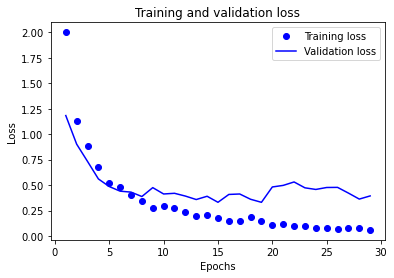

In [13]:
# plot training/validation accuracy curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

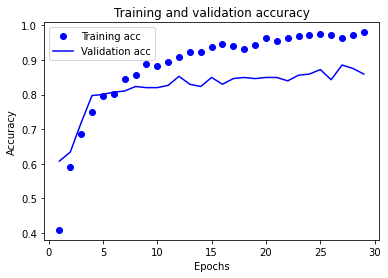

In [14]:
plt.clf()   # clear figure
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [17]:
model = keras.models.load_model('checkpoint/88/best_traffic.h5')

In [18]:
# Create lists to hold the truth and prediction values from the datasets
predictions_train = []
truth_train = []
predictions_val = []
truth_val = []
# Loop over the training set and grab the truth and predictions
for images, labels in train_ds:
    predictions_train.append(np.argmax(model.predict(images), axis=1))
    truth_train.append(labels.numpy())
# convert to 1D numpy array
predictions_train = np.concatenate(predictions_train, axis=0)
truth_train = np.concatenate(truth_train, axis=0)

# Loop over the validation set and grab the truth and predictions
for images, labels in val_ds:
    predictions_val.append(np.argmax(model.predict(images), axis=1))
    truth_val.append(labels.numpy())
predictions_val = np.concatenate(predictions_val, axis=0)
truth_val = np.concatenate(truth_val, axis=0)

# Get accuracy values by comparing the respective sets' arrays over total
train_acc = sum(predictions_train == truth_train) / len(truth_train)
val_acc = sum(predictions_val == truth_val) / len(truth_val)
print(f'Train set accuracy: {train_acc:.0%}')
print(f'Validation set accuracy: {val_acc:.0%}')

# Convert to tensors for input in to the confusion matrix function
predictions_train, truth_train = tf.convert_to_tensor(predictions_train), tf.convert_to_tensor(truth_train)
predictions_val, truth_val = tf.convert_to_tensor(predictions_val), tf.convert_to_tensor(truth_val)

Train set accuracy: 97%
Validation set accuracy: 89%


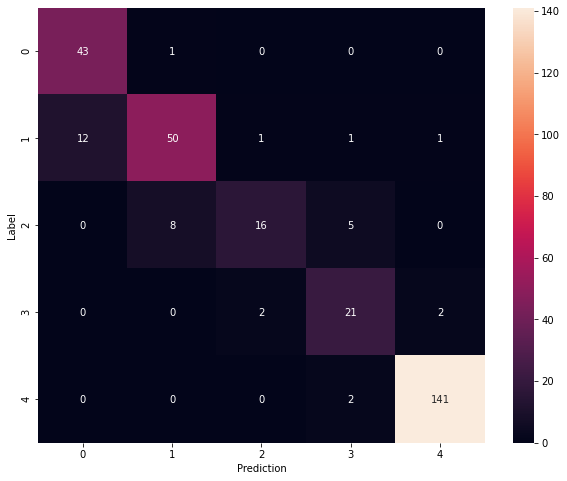

In [19]:
# Training outcome confusion matrix construction
confusion_mtx = tf.math.confusion_matrix(truth_val, predictions_val) 
plt.figure(figsize=(10, 8))
# Use seaborn to create a visual heatmap rather than just an array being printed
sns.heatmap(confusion_mtx, xticklabels=class_names, yticklabels=class_names, 
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()